

## **Buisness Problem**: Retail Analysis (Cross-sell & Up-sell)



# **Dataset** 
(Online Retail.xlsx)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
! git clone https://github.com/Swapnil-Damate/Upselling-and-cross-selling-.git
#written by Swapnil


Cloning into 'Upselling-and-cross-selling-'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
dataset = pd.read_excel('/content/Upselling-and-cross-selling-/Online Retail.xlsx')
df = dataset.copy()
#written By Swapnil

## **Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
 df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [ ]:
       #Creating Total amount variable and adding it to dataset
TotalAmount=df['Quantity']*df['UnitPrice']
df.insert(loc=6,column='TotalAmount',value=TotalAmount)
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','TotalAmount','Description','InvoiceDate','Country']]
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [ ]:
                                                  #Total amount of purchases for each customer
new_df=df.groupby(['CustomerID']).sum()
new_df.sort_values('TotalAmount',ascending=False,inplace=True)
final_df = new_df[(new_df['Quantity']>0) & (new_df['TotalAmount'] > 0)]
final_df.head(10)

,Quantity,UnitPrice,TotalAmount
CustomerID,,,
14646.0,196719,5400.21,279489.02
18102.0,64122,5159.73,256438.49
17450.0,69029,3320.09,187482.17
14911.0,77180,31060.66,132572.62
12415.0,77242,2499.82,123725.45
14156.0,57025,6544.29,113384.14
17511.0,63012,2607.08,88125.38
16684.0,49390,709.93,65892.08
13694.0,61803,1163.81,62653.10


In [ ]:
dff = df.copy()
dff = dff.drop('CustomerID',axis=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


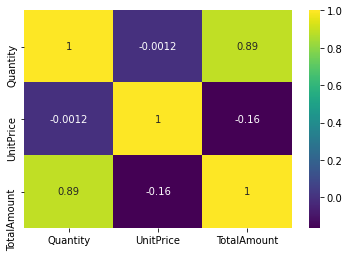

In [ ]:
import seaborn as sns
sns.heatmap(dff.corr(),annot=True,cmap='viridis')

In [ ]:
                                                             #Customer who paid most and least
print('Customer ID {} had paid maximum amount of {}'.format(int(final_df['TotalAmount'].argmax()),final_df['TotalAmount'].max()))
print('Customer ID {} had paid minimum amount of {}'.format(int(final_df['TotalAmount'].argmin()),final_df['TotalAmount'].min()))

Customer ID 0 had paid maximum amount of 279489.0199999999
Customer ID 4314 had paid minimum amount of 2.8999999999941792


In [ ]:
                                                            #Maximum and Minimum no. of quantity and it's corresponding customer ID 
print('The maximum number of products has been bought is {} by customer id {}'.format(final_df['Quantity'].max(),final_df['Quantity'].argmax()))
print('The minimum number of product has been bought is {} by customer id {}'.format(final_df['Quantity'].min(),final_df['Quantity'].argmin()))

The maximum number of products has been bought is 196719 by customer id 0
The minimum number of product has been bought is 1 by customer id 858


In [ ]:
                                            #Total sales at each country and how many quantities sold at each country
country=df.groupby(['Country']).sum()
country.sort_values('TotalAmount',ascending=False,inplace=True)
country.drop('CustomerID',axis=1,inplace=True)
country.head()

,Quantity,UnitPrice,TotalAmount
Country,,,
United Kingdom,4263829,2.245715e+06,8.187806e+06
Netherlands,200128,6.492550e+03,2.846615e+05
EIRE,142637,4.844719e+04,2.632768e+05
Germany,117448,3.766600e+04,2.216982e+05
France,110480,4.303199e+04,1.974039e+05


# **Data Cleaning / Data Preprocessing**

In [ ]:
df.shape

(541909, 9)

In [ ]:
df.describe()

,CustomerID,Quantity,UnitPrice,TotalAmount
count,406829.000000,541909.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114,17.987795
std,1713.600303,218.081158,96.759853,378.810824
min,12346.000000,-80995.000000,-11062.060000,-168469.600000
25%,13953.000000,1.000000,1.250000,3.400000
50%,15152.000000,3.000000,2.080000,9.750000
75%,16791.000000,10.000000,4.130000,17.400000
max,18287.000000,80995.000000,38970.000000,168469.600000


In [ ]:
#To remove extra spaces in Description if present
df['Description'] = df['Description'].str.strip()

In [ ]:
#Drop NaN Entries
df.dropna()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df['StockCode'] = df['StockCode'].astype('str')
df.shape

(541909, 9)

In [ ]:
#Remove cancelled/Retured Transaction
df = df[~df['InvoiceNo'].str.contains('C')]

df = df[~df['InvoiceNo'].str.contains('A')]


# **Feature Engineering**

In [ ]:

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 532618, dtype: datetime64[ns]

In [ ]:
df['year']=df['InvoiceDate'].apply(lambda date:date.year)
df['month']=df['InvoiceDate'].apply(lambda date:date.month)

# **Evaluate Algorithm**

In [ ]:
!pip install mlxtend==0.17.0
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

     |████████████████████████████████| 1.3MB 7.9MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
basket_Germany = (df[df['Country'] == 'Germany']
             .groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket_Germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket_Germany.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

## Apriori Algorithm

In [ ]:
frequent_items = apriori(basket_sets, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_items, metric='lift', min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3 PIECE SPACEBOY COOKIE CUTTER SET),(ROUND SNACK BOXES SET OF4 WOODLAND),0.041575,0.245077,0.021882,0.526316,2.147556,0.011693,1.593727
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.245077,0.041575,0.021882,0.089286,2.147556,0.011693,1.052388
2,(6 RIBBONS RUSTIC CHARM),(CHOCOLATE BOX RIBBONS),0.102845,0.037199,0.021882,0.212766,5.719650,0.018056,1.223017
3,(CHOCOLATE BOX RIBBONS),(6 RIBBONS RUSTIC CHARM),0.037199,0.102845,0.021882,0.588235,5.719650,0.018056,2.178806
4,(6 RIBBONS RUSTIC CHARM),(PLASTERS IN TIN CIRCUS PARADE),0.102845,0.115974,0.024070,0.234043,2.018065,0.012143,1.154145


In [ ]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.80) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,(BLUE POLKADOT BOWL),(RED RETROSPOT CUP),0.032823,0.070022,0.026258,0.800000,11.425000,0.023960,4.649891
65,(BLUE STRIPE CERAMIC DRAWER KNOB),(RED STRIPE CERAMIC DRAWER KNOB),0.028446,0.045952,0.024070,0.846154,18.413919,0.022763,6.201313
67,(BLUE STRIPE CERAMIC DRAWER KNOB),(WHITE SPOT RED CERAMIC DRAWER KNOB),0.028446,0.052516,0.024070,0.846154,16.112179,0.022576,6.158643
69,(PINK VINTAGE SPOT BEAKER),(BLUE VINTAGE SPOT BEAKER),0.024070,0.030635,0.024070,1.000000,32.642857,0.023333,inf
88,(CHARLOTTE BAG SUKI DESIGN),(WOODLAND CHARLOTTE BAG),0.045952,0.126915,0.037199,0.809524,6.378489,0.031367,4.583698
100,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.048140,0.050328,0.039387,0.818182,16.256917,0.036965,5.223195
110,(COFFEE MUG PEARS DESIGN),(COFFEE MUG APPLES DESIGN),0.039387,0.061269,0.035011,0.888889,14.507937,0.032598,8.448578
124,(DINOSAUR PARTY BAG + STICKER SET),(WOODLAND PARTY BAG + STICKER SET),0.021882,0.067834,0.021882,1.000000,14.741935,0.020398,inf
126,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.026258,0.024070,0.024070,0.916667,38.083333,0.023438,11.711160
127,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.024070,0.026258,0.024070,1.000000,38.083333,0.023438,inf


# FpGrowth Algorithm

In [ ]:
frequent_items2 = fpgrowth(basket_sets,
                          min_support = 0.02, use_colnames = True)
rules2 = association_rules(frequent_items2, metric="lift", min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG WOODLAND ANIMALS),(WOODLAND CHARLOTTE BAG),0.100656,0.126915,0.048140,0.478261,3.768366,0.035365,1.673414
1,(WOODLAND CHARLOTTE BAG),(JUMBO BAG WOODLAND ANIMALS),0.126915,0.100656,0.048140,0.379310,3.768366,0.035365,1.448942
2,(JUMBO BAG WOODLAND ANIMALS),(PLASTERS IN TIN WOODLAND ANIMALS),0.100656,0.137856,0.028446,0.282609,2.050035,0.014570,1.201777
3,(PLASTERS IN TIN WOODLAND ANIMALS),(JUMBO BAG WOODLAND ANIMALS),0.137856,0.100656,0.028446,0.206349,2.050035,0.014570,1.133173
4,(JUMBO BAG WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.100656,0.245077,0.037199,0.369565,1.507958,0.012531,1.197465


In [ ]:
Rules = rules2[ (rules2['lift'] >= 6) &
       (rules2['confidence'] >= 0.80) ]
Rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.035011,0.063457,0.032823,0.93750,14.773707,0.030601,14.984683
46,"(JUMBO BAG RED RETROSPOT, WOODLAND CHARLOTTE BAG)",(JUMBO BAG WOODLAND ANIMALS),0.024070,0.100656,0.024070,1.00000,9.934783,0.021647,inf
159,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.84375,6.648168,0.050194,5.587746
172,"(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",(WOODLAND CHARLOTTE BAG),0.030635,0.126915,0.030635,1.00000,7.879310,0.026747,inf
177,"(SPACEBOY LUNCH BOX, RED RETROSPOT CHARLOTTE BAG)",(WOODLAND CHARLOTTE BAG),0.021882,0.126915,0.021882,1.00000,7.879310,0.019105,inf


# Result Visualization

In [ ]:
#result.to_excel('/content/drive/My Drive/Internship Model Result/Final_retail_result.xlsx')
final_Table = pd.read_excel('/content/Upselling-and-cross-selling-/Final_onlineretail_result.xlsx')
final_Table = final_Table.drop('Unnamed: 0', axis=1)
final_Table = final_Table.drop('Unnamed: 0.1', axis=1)
final_Table = final_Table.replace()
final_Table

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,JAM JAR WITH GREEN LID,JAM JAR WITH PINK LID,0.035011,0.063457,0.032823,0.937500,14.773707,0.030601,14.984683
1,"JUMBO BAG RED RETROSPOT, WOODLAND CHARLOTTE BAG",JUMBO BAG WOODLAND ANIMALS,0.024070,0.100656,0.024070,1.000000,9.934783,0.021647,inf
2,RED RETROSPOT CHARLOTTE BAG,WOODLAND CHARLOTTE BAG,0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
3,"ROUND SNACK BOXES SET OF4 WOODLAND, RED RETROS...",WOODLAND CHARLOTTE BAG,0.030635,0.126915,0.030635,1.000000,7.879310,0.026747,inf
4,"RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH BOX",WOODLAND CHARLOTTE BAG,0.021882,0.126915,0.021882,1.000000,7.879310,0.019105,inf
5,"RED RETROSPOT CHARLOTTE BAG, RED TOADSTOOL LED...",WOODLAND CHARLOTTE BAG,0.024070,0.126915,0.024070,1.000000,7.879310,0.021015,inf
6,"JUMBO BAG WOODLAND ANIMALS, RED RETROSPOT CHAR...",WOODLAND CHARLOTTE BAG,0.024070,0.126915,0.021882,0.909091,7.163009,0.018827,9.603939
7,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,0.035011,0.078775,0.032823,0.937500,11.901042,0.030065,14.739606
8,"JUMBO BAG WOODLAND ANIMALS, JUMBO BAG PINK POL...",JUMBO BAG RED RETROSPOT,0.026258,0.078775,0.026258,1.000000,12.694444,0.024190,inf
9,"JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT",JUMBO BAG WOODLAND ANIMALS,0.032823,0.100656,0.026258,0.800000,7.947826,0.022954,4.496718


##**MODEL**

# CROSS-SELL

1.

In [ ]:
def recme(antecedents):
  consequent = final_Table.loc[final_Table['antecedents'] == antecedents, 'consequents'].tolist()
  return consequent[0]

In [ ]:
recme('SPACEBOY CHILDRENS CUP')

'SPACEBOY CHILDRENS BOWL'

2.

In [ ]:
data_ib = (df[df['Country'] == 'Germany']
             .groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID'))
data_ib.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12468.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,25.0,25.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_ib=data_ib.reset_index()
data_ib.head()

Description,CustomerID,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,12426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12468.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,25.0,25.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_ib=data_ib.drop('CustomerID', 1)
data_ib.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,25.0,25.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Description v/s Description
data_ibs = pd.DataFrame(index=data_ib.columns,
                        columns=data_ib.columns)
data_ibs.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 COLOURED PARTY BALLOONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 IVORY ROSE PEG PLACE SETTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 MESSAGE CARDS WITH ENVELOPES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 PENCIL SMALL TUBE WOODLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_ibs = data_ibs.fillna(0)

In [ ]:
from scipy.spatial.distance import cosine
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(data_ib.iloc[:,i],data_ib.iloc[:,j])

In [ ]:
data_ibs.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,1.000000,0.342997,0.0,0.000000,0.469831,0.230631,0.213979,0.0,0.0,0.0,0.292509,0.242536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064249,0.00000,0.351702,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.146254,0.0,0.026003,0.000000,0.46676,0.342997,0.183340,0.0,0.0,0.214819,...,0.140028,0.0,0.0,0.0,0.485071,0.460179,0.485071,0.257248,0.216930,0.0,0.0,0.0,0.0,0.458349,0.342997,0.0,0.000000,0.0,0.0,0.646762,0.428086,0.000000,0.0,0.060634,0.420084,0.485071,0.560112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.342997,0.0,0.0,0.000000,0.000000,0.0
12 COLOURED PARTY BALLOONS,0.342997,1.000000,0.0,0.000000,0.000000,0.336199,0.000000,0.0,0.0,0.0,0.426401,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.500000,0.267261,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.235702,0.277350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.0
12 IVORY ROSE PEG PLACE SETTINGS,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.107211,0.577350,0.19245,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.316228,0.000000,0.000000,0.447214,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.196116,0.000000,0.0,0.000000,0.000000,0.000000,0.577350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
12 MESSAGE CARDS WITH ENVELOPES,0.000000,0.000000,0.0,1.000000,0.028075,0.106315,0.131519,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.043234,

In [ ]:
data_neighbours = pd.DataFrame(index=data_ibs.columns,columns=range(1,5))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_ibs.columns)):
    data_neighbours.iloc[i,:4] = data_ibs.iloc[0:,i].sort_values(ascending=False)[:4].index
data_neighbours = data_neighbours.reset_index()

In [ ]:
data_neighbours.head(50)

,Description,rec_1,rec_2,rec_3,rec_4
0,10 COLOUR SPACEBOY PEN,10 COLOUR SPACEBOY PEN,KITTY PENCIL ERASERS,BLOSSOM IMAGES GIFT WRAP SET,DINOSAUR HEIGHT CHART STICKER SET
1,12 COLOURED PARTY BALLOONS,12 COLOURED PARTY BALLOONS,AIRLINE BAG VINTAGE JET SET WHITE,CHRISTMAS TREE HANGING GOLD,CHRISTMAS TREE PAINTED ZINC
2,12 IVORY ROSE PEG PLACE SETTINGS,ASSTD DESIGN 3D PAPER STICKERS,12 IVORY ROSE PEG PLACE SETTINGS,BLUE VOILE LAMPSHADE,HANGING PHOTO CLIP ROPE LADDER
3,12 MESSAGE CARDS WITH ENVELOPES,12 MESSAGE CARDS WITH ENVELOPES,JAZZ HEARTS PURSE NOTEBOOK,ANIMAL STICKERS,GYMKHANA TREASURE BOOK BOX
4,12 PENCIL SMALL TUBE WOODLAND,12 PENCIL SMALL TUBE WOODLAND,GOLD FISHING GNOME,ICE CREAM DESIGN GARDEN PARASOL,CALENDAR PAPER CUT DESIGN
5,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED RETROSPOT,BUBBLEGUM RING ASSORTED,HOME SWEET HOME BLACKBOARD,HEART IVORY TRELLIS LARGE
6,12 PENCILS SMALL TUBE SKULL,12 PENCILS SMALL TUBE SKULL,HEADS AND TAILS SPORTING FUN,CHRISTMAS CARD SINGING ANGEL,CHOCOLATE CALCULATOR
7,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE POSY,BIRTHDAY PARTY CORDON BARRIER TAPE,ASSORTED COLOUR T-LIGHT HOLDER,HANGING MINI COLOURED BOTTLES
8,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,JUMBO BAG DOLLY GIRL DESIGN
9,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE RED RETROSPOT,JUMBO BAG DOLLY GIRL DESIGN,BALLOON PUMP WITH 10 BALLOONS


In [ ]:
data_neighbours.columns = [
  'Description',
  'rec_1',
  'rec_2',
  'rec_3',
  'rec_4',

]
data_neighbours.shape

(1695, 5)

In [ ]:
data_neighbours.tail(20)

,Description,rec_1,rec_2,rec_3,rec_4
1675,WRAP RED APPLES,CARD CHRISTMAS VILLAGE,BOHEMIAN COLLAGE STATIONERY SET,CHARLOTTE BAG VINTAGE ALPHABET,CHILDREN'S CIRCUS PARADE MUG
1676,WRAP RED DOILEY,HEART WOODEN CHRISTMAS DECORATION,FELTCRAFT CHRISTMAS FAIRY,3 STRIPEY MICE FELTCRAFT,CARD CIRCUS PARADE
1677,WRAP RED VINTAGE DOILY,CHILDS GARDEN TROWEL BLUE,CHILDS GARDEN TROWEL PINK,ENGLISH ROSE GARDEN SECATEURS,BLUE POLKADOT EGG CUP
1678,WRAP SUKI AND FRIENDS,BLUE HARMONICA IN BOX,FANCY FONTS BIRTHDAY WRAP,BLUE POLKADOT WRAP,HAND WARMER RED RETROSPOT
1679,WRAP VINTAGE LEAF DESIGN,FELTCRAFT CUSHION RABBIT,ALARM CLOCK BAKELIKE CHOCOLATE,FELTCRAFT CUSHION OWL,ICE CREAM DESIGN GARDEN PARASOL
1680,WRAP VINTAGE PETALS DESIGN,JUMBO BAG DOILEY PATTERNS,5 HOOK HANGER MAGIC TOADSTOOL,BRIGHT BLUES RIBBONS,CARD CIRCUS PARADE
1681,WRAP WEDDING DAY,ASSORTED EASTER GIFT TAGS,GOLD FISHING GNOME,ICE CREAM DESIGN GARDEN PARASOL,CALENDAR FAMILY FAVOURITES
1682,"WRAP, BILLBOARD FONTS DESIGN",ASSTD DESIGN 3D PAPER STICKERS,12 IVORY ROSE PEG PLACE SETTINGS,BLUE VOILE LAMPSHADE,HANGING PHOTO CLIP ROPE LADDER
1683,YELLOW COAT RACK PARIS FASHION,KITCHEN METAL SIGN,CHERRY CROCHET FOOD COVER,DOORMAT HEARTS,BLACK CHRISTMAS TREE 60CM
1684,YOU'RE CONFUSING ME METAL SIGN,BLUE PAPER PARASOL,CERAMIC LOVE HEART MONEY BANK,CERAMIC PLATE STRAWBERRY DESIGN,CAKE PLATE LOVEBIRD PINK


In [ ]:
def rec_cross(Description):
  #rec_1 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_1'].tolist()
  #print('First Reccomendation for Cross-sell: ', rec_1)
  rec_2 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_2'].tolist()
  print('First Reccomendation for Cross-sell: ', rec_2)
  rec_3 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_3'].tolist()
  print('Second Reccomendation for Cross-sell: ', rec_3)
  rec_4 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_4'].tolist()
  print('Third Reccomendation for Cross-sell: ', rec_4)
  


In [ ]:
rec_cross('10 COLOUR SPACEBOY PEN')

First Reccomendation for Cross-sell:  ['KITTY PENCIL ERASERS']
Second Reccomendation for Cross-sell:  ['BLOSSOM IMAGES GIFT WRAP SET']
Third Reccomendation for Cross-sell:  ['DINOSAUR HEIGHT CHART STICKER SET']


In [ ]:
rec_cross('12 COLOURED PARTY BALLOONS')

First Reccomendation for Cross-sell:  ['AIRLINE BAG VINTAGE JET SET WHITE']
Second Reccomendation for Cross-sell:  ['CHRISTMAS TREE HANGING GOLD']
Third Reccomendation for Cross-sell:  ['CHRISTMAS TREE PAINTED ZINC']


In [ ]:
rec_cross('5 HOOK HANGER MAGIC TOADSTOOL')

First Reccomendation for Cross-sell:  ['CARD BIRTHDAY COWBOY']
Second Reccomendation for Cross-sell:  ['HOOK, 1 HANGER ,MAGIC GARDEN']
Third Reccomendation for Cross-sell:  ['CHRISTMAS GINGHAM HEART']


In [ ]:
rec_cross('ZINC BOX SIGN HOME')

First Reccomendation for Cross-sell:  ["3 RAFFIA RIBBONS 50'S CHRISTMAS"]
Second Reccomendation for Cross-sell:  ['ZINC WILLIE WINKIE  CANDLE STICK']
Third Reccomendation for Cross-sell:  ['FRYING PAN RED RETROSPOT']


In [ ]:
rec_cross('6 RIBBONS EMPIRE')

First Reccomendation for Cross-sell:  ['CHOCOLATE BOX RIBBONS']
Second Reccomendation for Cross-sell:  ['BISCUIT TIN VINTAGE CHRISTMAS']
Third Reccomendation for Cross-sell:  ['FAWN BLUE HOT WATER BOTTLE']


# UPSELL

In [ ]:
!pip install gensim
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=dataset.copy()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,"17,850",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,"17,850",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,"17,850",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,"17,850",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,"17,850",United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
# Preprocessing
df['clean_products'] = df['Description'].str.replace("[^a-zA-Z#]", " ")
df['clean_products'] = df['clean_products'].fillna('').apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df['clean_products'] = df['clean_products'].fillna('').apply(lambda x: x.lower())
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clean_products
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,"17,850",United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,1,"12,680",France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2,"12,680",France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4,"12,680",France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4,"12,680",France,childrens cutlery circus parade


In [ ]:
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = df['clean_products'].fillna('').apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['clean_products'] = detokenized_doc
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clean_products
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,"17,850",United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,1,"12,680",France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2,"12,680",France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4,"12,680",France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4,"12,680",France,childrens cutlery circus parade


In [ ]:
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
clean_products         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
clean_products    0
dtype: int64

In [ ]:
df['StockCode']= df['StockCode'].astype(str)

In [ ]:
customers = df["CustomerID"].unique().tolist()
len(customers)

4372

In [ ]:
select=df[['StockCode','CustomerID','clean_products','UnitPrice','Description']]
df=select.copy()
df

,StockCode,CustomerID,clean_products,UnitPrice,Description
0,85123A,"17,850",white hanging heart light holder,3,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,"17,850",white metal lantern,3,WHITE METAL LANTERN
2,84406B,"17,850",cream cupid hearts coat hanger,3,CREAM CUPID HEARTS COAT HANGER
3,84029G,"17,850",knitted union flag hot water bottle,3,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,"17,850",red woolly hottie white heart,3,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...,...,...
541904,22613,"12,680",pack spaceboy napkins,1,PACK OF 20 SPACEBOY NAPKINS
541905,22899,"12,680",children apron dolly girl,2,CHILDREN'S APRON DOLLY GIRL
541906,23254,"12,680",childrens cutlery dolly girl,4,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,"12,680",childrens cutlery circus parade,4,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
purchases= []

 #populate the list with the product codes
for i in tqdm(customers):
    temp = df[df["CustomerID"] == i]["StockCode"].tolist()
    purchases.append(temp)

100%|██████████| 4372/4372 [00:05<00:00, 850.94it/s]


In [ ]:
print(purchases[0:2])


[['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730', '22633', '22632', '22632', '22633', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '21730', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '21730', '22632', '22633', '85123A', '71053', '84406B', '15056BL', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '85123A', '71053', '82483', '82486', '82482', '82494L', '22411', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '37370', '21871', '21071', '21068', '82483', '22411', '84029G', '84029E', '21730', '22

In [ ]:
model = Word2Vec(window = 10, sg = 1,negative = 10) # for negative sampling

model.build_vocab(purchases, progress_per=200)

model.train(purchases, total_examples = model.corpus_count, epochs=10)

(4028861, 4068290)

In [ ]:
model.init_sims(replace=True)
print(model)

Word2Vec(vocab=3208, size=100, alpha=0.025)


In [ ]:
# extract all vectors
X = model[model.wv.vocab]
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(3208, 100)

In [ ]:
products = df[["StockCode", "Description","UnitPrice"]].copy()
products

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3
1,71053,WHITE METAL LANTERN,3
2,84406B,CREAM CUPID HEARTS COAT HANGER,3
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3
...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,1
541905,22899,CHILDREN'S APRON DOLLY GIRL,2
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


In [ ]:
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")
products_dict = products.groupby('StockCode')["Description"].apply(list).to_dict()
products_dict

{'10002': ['INFLATABLE POLITICAL GLOBE '],
 '10080': ['GROOVY CACTUS INFLATABLE'],
 '10120': ['DOGGY RUBBER'],
 '10123C': ['HEARTS WRAPPING TAPE '],
 '10124A': ['SPOTS ON RED BOOKCOVER TAPE'],
 '10124G': ['ARMY CAMO BOOKCOVER TAPE'],
 '10125': ['MINI FUNKY DESIGN TAPES'],
 '10133': ['COLOURING PENCILS BROWN TUBE'],
 '10135': ['COLOURING PENCILS BROWN TUBE'],
 '11001': ['ASSTD DESIGN RACING CAR PEN'],
 '15030': ['FAN BLACK FRAME '],
 '15034': ['PAPER POCKET TRAVELING FAN '],
 '15036': ['ASSORTED COLOURS SILK FAN'],
 '15039': ['SANDALWOOD FAN'],
 '15044A': ['PINK PAPER PARASOL '],
 '15044B': ['BLUE PAPER PARASOL '],
 '15044C': ['PURPLE PAPER PARASOL'],
 '15044D': ['RED PAPER PARASOL'],
 '15056BL': ['EDWARDIAN PARASOL BLACK'],
 '15056N': ['EDWARDIAN PARASOL NATURAL'],
 '15056P': ['EDWARDIAN PARASOL PINK'],
 '15058A': ['BLUE POLKADOT GARDEN PARASOL'],
 '15058B': ['PINK POLKADOT GARDEN PARASOL'],
 '15058C': ['ICE CREAM DESIGN GARDEN PARASOL'],
 '15060B': ['FAIRY CAKE DESIGN UMBRELLA'],
 '16

In [ ]:
def similar_products(no, n = 10):
    v=model[no]
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        k=products.loc[products['StockCode'] == j[0],'UnitPrice'].tolist()
        pair = (j[0], products_dict[ j[0]][0], k[0], j[1])
        new_ms.append(pair)
    
    return pd.DataFrame(new_ms,columns=['StockCode','Product','Price','Weightage']).sort_values(by=['Price'],ascending=False).\
                    set_index('StockCode')

In [ ]:
def product_detail(var): 
    prod_name=products_dict[var]
    prod_value=products.loc[products['StockCode'] == var,'UnitPrice'].tolist()
    list_of_tuples = [(var,prod_name[0],prod_value[0])]
    return pd.DataFrame(list_of_tuples,columns=['StockCode','Description','Price']).set_index('StockCode') 

In [ ]:
product_detail('85123A') 

,Description,Price
StockCode,,
85123A,CREAM HANGING HEART T-LIGHT HOLDER,3


In [ ]:
similar_products('85123A')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,Product,Price,Weightage
StockCode,,,
22828,REGENCY MIRROR WITH SHUTTERS,145,1
21755,LOVE BUILDING BLOCK WORD,6,1
22804,PINK HANGING HEART T-LIGHT HOLDER,3,1
21733,RED HANGING HEART T-LIGHT HOLDER,3,1
82494L,WOODEN FRAME ANTIQUE WHITE,3,1
22469,HEART OF WICKER SMALL,2,1
84978,HANGING HEART JAR T-LIGHT HOLDER,1,1
71459,HANGING JAM JAR T-LIGHT HOLDERS,1,1
84970S,HANGING HEART ZINC T-LIGHT HOLDER,1,1


In [ ]:
#product_detail('16218')
#similar_products('16218')

In [ ]:
#product_detail('22464')
#similar_products('22464')

## FINAL MODEL

Cross Sell

In [ ]:
rec_cross('10 COLOUR SPACEBOY PEN')

Up Sell

In [ ]:
product_detail('16218')
similar_products('16218')